In [1]:
import numpy as np
import pylorentz
import random

import sys,os
from pathlib import Path

In [2]:
ana_helper_path = "/project/def-mdiamond/tomren/jupyter/Mu_helper/muhelper/"
sys.path.append(ana_helper_path)
import sim_filereader_helper
import visualization as vis
import util


%run "/project/def-mdiamond/tomren/jupyter/Mu_helper/muhelper/common_import.ipynb"


# DATA_DIR    = "/project/def-mdiamond/tomren/mathusla/data/"
DATA_DIR    = "/project/rrg-mdiamond/tomren/mudata/LLP/"

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)


Welcome to JupyROOT 6.24/06

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



# 1. Generate simulation input for LLP

## 1.1 LLP with given lifetime

You need:
1) file containing LLP direction
2) file containing LLP decay product

Model parameters:
* mX: LLP mass in [GeV]
* c*tau: LLP lifetime [m]

And run parameters:
* N_MC: number of events to generate
* rand_seed: a seed for random number generator. Use a specific number for reproducibility. Use None for randomization.
* nprint: print status every n events

In [9]:
reload(util)
reload(sim_filereader_helper)

<module 'sim_filereader_helper' from '/project/def-mdiamond/tomren/jupyter/Mu_helper/muhelper/sim_filereader_helper.py'>

In [44]:
# ---- Model parameter---
mX=25     # GeV
ctau=1000 #m

# ---- Run parameter---
N_MC = 10000
rand_seed = 1
nprint=1000

# ---- Files ----
LLP_type = "MATHUSLA_LLPfiles_HXX"
filename_llp4vec  = f"{DATA_DIR}/Raw/{LLP_type}/All_HXX_LLP4vectors/HXX_LLP4vectors_mX_{mX}_2perevent_unweighted.csv"
filename_products = f"{DATA_DIR}/Raw/{LLP_type}/H_hadronic_decays_geant/bb_{mX}.txt"
filename_output = f"{DATA_DIR}/SimInput/{LLP_type}/test_LLP_bb_{mX}.txt"

In [45]:
# Run the sampling
vecs_used_list = sim_filereader_helper.process_llp_filereader_uniform_weight(filename_llp4vec, filename_products, filename_output, mX, ctau, N_MC, rand_seed=rand_seed, nprint=nprint)
# vecs_used_list = process_llp_filereader_uniform_weight(filename_llp4vec, filename_products, filename_output, mX, ctau, N_MC, rand_seed=rand_seed, nprint=nprint)

print(len(np.unique(vecs_used_list))/len(vecs_used_list))

Reading LLP 4-vector file
  167284 4-vectors
Reading LLP decay product file
  19999 LLP decay events
Calculating kinematics of 4vecs
Selecting 10000 events out of 19999
  Processed 1000 events
  Processed 2000 events
  Processed 3000 events
  Processed 4000 events
  Processed 5000 events
  Processed 6000 events
  Processed 7000 events
  Processed 8000 events
  Processed 9000 events
  Processed 10000 events

 ** LLP 4-vec used for 0.6841359604026686 times on average ** 

  Total 10000 events processed
Output saved as /project/rrg-mdiamond/tomren/mudata/LLP//SimInput/MATHUSLA_LLPfiles_HXX/test_LLP_bb_25.txt for simulation use
Macro file saved at  /project/rrg-mdiamond/tomren/mudata/LLP/SimInput/MATHUSLA_LLPfiles_HXX/test_LLP_bb_25.mac for simulation use
0.7648


## 1.2 LLP with given mixing angle

You need:
1) file containing LLP direction
2) file containing LLP decay product
3) file containing life time - mass curve

Model parameters:
* mX: LLP mass in [GeV]
* Usq: Mixing angle between LLP and other particle

And run parameters:
* N_MC: number of events to generate
* rand_seed: a seed for random number generator. Use a specific number for reproducibility. Use None for randomization.
* nprint: print status every n events

In [3]:
# ---- Model parameter---
mX=25     # GeV # this should be set later
Usq=1e-14

# ---- Run parameter---
N_MC = 10000
rand_seed = 1
nprint=1000


# ---- Files ----
LLP_type = "MATHUSLA_LLPfiles_SMS"
Decay_type = "cc"

available_LLPmass_fnames = glob.glob(f"{DATA_DIR}/Raw/{LLP_type}/All_SMS_LLPweight4vectors_from_B/*")
available_LLPmass = np.sort([util.Utils.find_float(Path(i).name,return_format="str")[-1] for i in available_LLPmass_fnames])
print("Available LLP mass:",available_LLPmass)
print("Example filename:", available_LLPmass_fnames[0])
mX = available_LLPmass[-1]

filename_llp4vec  = f"{DATA_DIR}/Raw/{LLP_type}/All_SMS_LLPweight4vectors_from_B/SMS_LLPweight4vectorBmesonlist_mS_{mX}.csv"
filename_products = f"{DATA_DIR}/Raw/{LLP_type}/SMS_LLP_decays_geant/{Decay_type}_{mX}.txt"
filename_lifetime = f"{DATA_DIR}/Raw/{LLP_type}/SMS_lifetime_mSGeV_ctaumeters.csv" # Energy[GeV], decayLength[m]
filename_output = f"{DATA_DIR}/SimInput/{LLP_type}/test_LLP_{Decay_type}_{mX}.txt"

for i in [filename_llp4vec,filename_products,filename_lifetime]:
    if not os.path.exists(i):
        print("File does not exist!", i)
    else:
        print("File found:", i)
        
mX=float(mX)

Available LLP mass: ['0.03' '0.0774597' '0.2' '0.212' '0.241254' '0.274545' '0.312429'
 '0.355542' '0.404603' '0.460435' '0.52397' '0.596273' '0.678553'
 '0.772187' '0.878742' '1.' '1.1' '1.19208' '1.29186' '1.4' '1.60195'
 '1.83303' '1.9' '2.09744' '2.4' '2.5' '2.56416' '2.62997' '2.69747'
 '2.7667' '2.8377' '2.91053' '2.98523' '3.06185' '3.14043' '3.22102'
 '3.30369' '3.38848' '3.47544' '3.56464' '3.65613' '3.74996' '3.8462'
 '3.94491' '4.04616' '4.15' '4.25651' '4.36576' '4.47781' '4.59274' '4.7']
Example filename: /project/rrg-mdiamond/tomren/mudata/LLP//Raw/MATHUSLA_LLPfiles_SMS/All_SMS_LLPweight4vectors_from_B/SMS_LLPweight4vectorBmesonlist_mS_2.5.csv
File found: /project/rrg-mdiamond/tomren/mudata/LLP//Raw/MATHUSLA_LLPfiles_SMS/All_SMS_LLPweight4vectors_from_B/SMS_LLPweight4vectorBmesonlist_mS_4.7.csv
File found: /project/rrg-mdiamond/tomren/mudata/LLP//Raw/MATHUSLA_LLPfiles_SMS/SMS_LLP_decays_geant/cc_4.7.txt
File found: /project/rrg-mdiamond/tomren/mudata/LLP//Raw/MATHUSLA_LLP

findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.


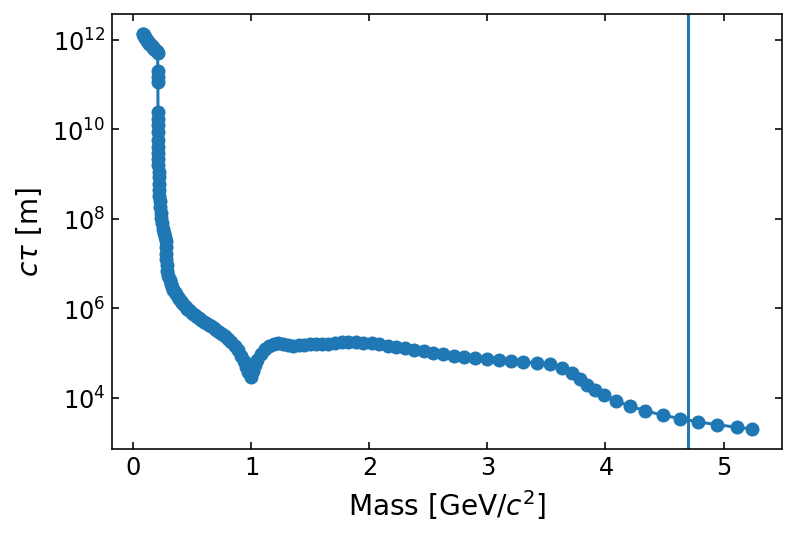

mX 4.7 [GeV]
c*tau 3216.237613447071 [m]


In [4]:
lifetime_data = np.loadtxt(filename_lifetime,delimiter=",").T
lifetime_interp = sp.interpolate.interp1d(lifetime_data[0],lifetime_data[1],)

# plot(lifetime_data[0],lifetime_data[1],marker="o")
# plot(lifetime_data[0],lifetime_interp(lifetime_data[0]),marker="o")
# xlabel("Mass [GeV/$c^2$]")
# ylabel(r"$c\tau$ [m]")
# yscale("log")
# show()

plot(lifetime_data[0],lifetime_interp(lifetime_data[0])/Usq,marker="o")
axvline(float(mX))
xlabel("Mass [GeV/$c^2$]")
ylabel(r"$c\tau$ [m]")
yscale("log")
show()

ctau = lifetime_interp(float(mX))/Usq
print("mX",mX, "[GeV]")
print("c*tau",ctau, "[m]")

In [10]:
# Run the sampling
metadata = f"# Usq = {Usq} \n"
vecs_used_list = sim_filereader_helper.process_llp_filereader_uniform_weight(filename_llp4vec, filename_products, filename_output, 
                                                                             mX, ctau, N_MC, rand_seed=rand_seed, nprint=nprint,
                                                                            metadata = metadata)

print(len(np.unique(vecs_used_list))/len(vecs_used_list))

Reading LLP 4-vector file
  100000 4-vectors
Reading LLP decay product file
  19999 LLP decay events
Calculating kinematics of 4vecs
Selecting 10000 events out of 19999
  Processed 1000 events
  Processed 2000 events
  Processed 3000 events
  Processed 4000 events
  Processed 5000 events
  Processed 6000 events
  Processed 7000 events
  Processed 8000 events
  Processed 9000 events
  Processed 10000 events

 ** LLP 4-vec used for 1.67204 times on average ** 

  Total 10000 events processed
Output saved as /project/rrg-mdiamond/tomren/mudata/LLP//SimInput/MATHUSLA_LLPfiles_SMS/test_LLP_cc_4.7.txt for simulation use
Macro file saved at  /project/rrg-mdiamond/tomren/mudata/LLP/SimInput/MATHUSLA_LLPfiles_SMS/test_LLP_cc_4.7.mac for simulation use
0.6195


# Readback the file and have a look

In [11]:
fname = "/project/rrg-mdiamond/tomren/mudata/LLP//SimInput/MATHUSLA_LLPfiles_SMS/test_LLP_cc_4.7.txt"
# fname = f"{DATA_DIR}/SimInput/{LLP_type}/test_LLP_bb_{mX}.txt"
vertex, weights = sim_filereader_helper.read_raw_vertex_weight(fname)
all_vertex = vertex/1000 # Turn unit into meter

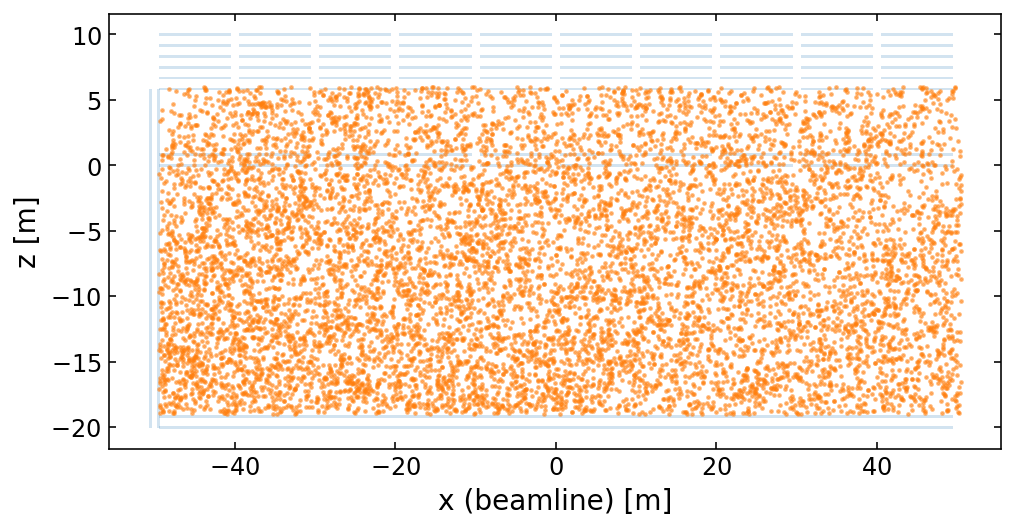

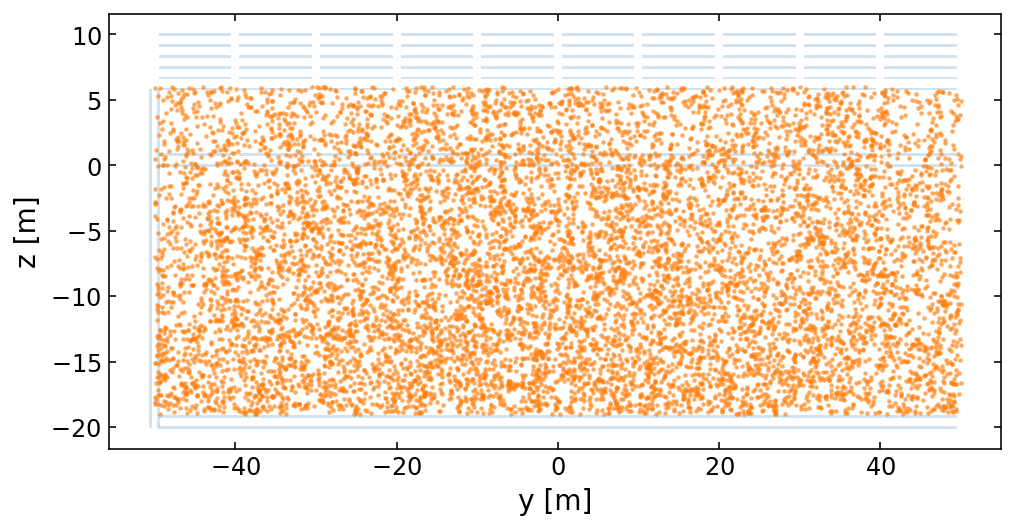

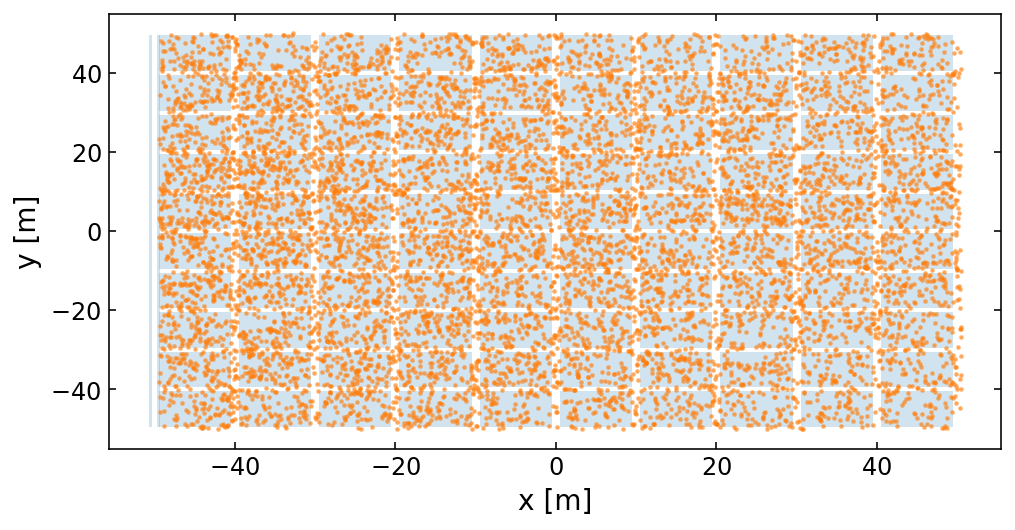

In [12]:
fig,ax=subplots(figsize=(8,4))
vis.drawdet_xz(alpha=0.2)
nplot=10000
scatter(all_vertex[:nplot,0]-70-49.5,-all_vertex[:nplot,2],s=2,alpha=0.5,color="C1")
# xlim(-50,50)
xlabel("x (beamline) [m]")
ylabel("z [m]")
show()

fig,ax=subplots(figsize=(8,4))
vis.drawdet_xz(alpha=0.2)
scatter(all_vertex[:nplot,1],-all_vertex[:nplot,2],s=2,alpha=0.5,color="C1")
# xlim(-50,50)
xlabel("y [m]")
ylabel("z [m]")
show()

fig,ax=subplots(figsize=(8,4))
vis.drawdet_xy(alpha=0.2)
scatter(all_vertex[:nplot,0]-70-49.5,-all_vertex[:nplot,1],s=2,alpha=0.5,color="C1")
# xlim(-50,50)
xlabel("x [m]")
ylabel("y [m]")
show()

1) Get a random LLP 4-vector (cut on eta, rotate phi, same as before)
2) Sample the decay location exponentially
    1) if the decay location is within the decay volume, get a decay product and record a event
    2) if the decay location is outside, return to 1) and get another LLP 4-vector